# Synopsis

This notebook reviews some of the most frequently used continuous random variables.

* uniform
* exponential
* Gaussian
* log-normal
* beta
* power-law
* gamma



# Read libraries

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from colorama import Back, Fore, Style
from copy import copy, deepcopy
from pathlib import Path
from sys import path

path.append( str(Path.cwd().parent) )

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from Amaral_libraries.my_stats import half_frame


In [4]:
my_fontsize = 15

# Continuous random variables

In this notebook, I give an overview of some commonly found distributions of continuous random variables.  This overview has two goals.  The first and most important reason is to provide a vocabulary with which to describe or model random processes.  Just as when trying to communicative in a new language, you need to memorize words in order to be able to express yourself effectively, when describing the properties of a random process you will find it useful to make reference to these distributions.

The second reason is that it provides, in some cases, the justification for the type of random processes that may give rise to a specified distribution.


## Uniform distribution 

Occurs for equi-probable random events.  The probability of an event is the inverse of length of the support interval, thus, the support must be finite. 

The probability density function is:

> $f(x; a, b) = \frac{1}{b-a}    ~~~~~~$ for      $~~~ a \le x \le b$.

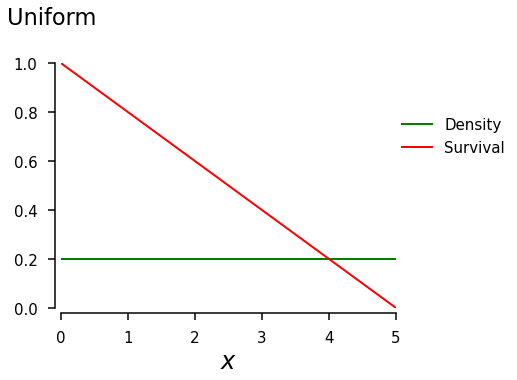

In [5]:
a = 0
b = 5
x = np.linspace(a, b)
f_x = stats.uniform(a, b)  # Generates asymptotic (frozen in scipy lingo) 
                           # distribution .rvs( size)

fig = plt.figure( figsize = (6, 4.5) )
fig.text(0, 1, 'Uniform', fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "$x$", "", font_size = my_fontsize)

# Calculate and plot histogram
ax.plot(x, f_x.pdf(x), color = "g", linewidth = 2, 
        label = "Density")
# ax.plot(x, f_x.cdf(x), color = "b", linewidth = 2,  
#         label = "Cumulative")
ax.plot(x, f_x.sf(x), color = "r", linewidth = 2, 
        label = "Survival")

ax.set_ylim(0, 1)
ax.set_xlim(0, 5)

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)

plt.show()

## Exponential distribution 

Occurs for failure events. The probability density function is:

> $f(x; \lambda) = \lambda ~e^{- \lambda x}~~~~~$     for       $ x, \lambda \ge 0$.

Another formulation is:

> $f(x; \tau) = \frac{1}{\tau} ~e^{- x / \tau}~~~~~$     for       $ x, \tau \ge 0$.

The mean and the standard deviation of the exponential equal $\tau$, the mode is at 0, and the median equals $\tau\ln 2$. 

The `scipy` package use the $\tau$ formulation, and allows for shifting the location of the random variable: 

> $Y = X + \mu$ .

We can then use the approach introduced in the section about functions of random variables to obtain the corresponding probability density.

> $f(y; \tau)~dy = f(x; \tau)~dx ~~~ \Rightarrow ~~~ f(y; \tau) = f(x; \tau)~ \frac{dx}{dy} = 
f(y-\mu; \tau) \times 1 =  \frac{1}{\tau}~e^{-(y - \mu)/\tau} $.

Renaming $y$ as $x$, we obtain

> $f(x; \mu, \tau) = \frac{1}{\tau}~e^{-(x - \mu)/\tau} ~~~~~$     for       $ x \ge \mu$.

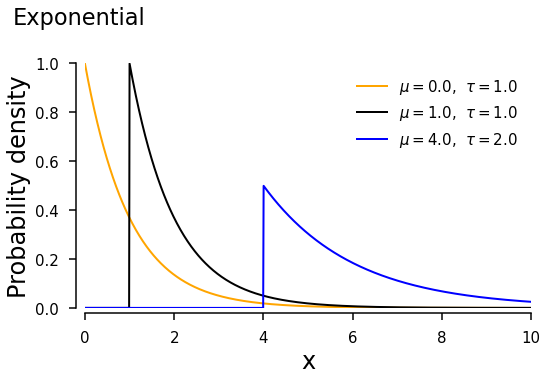

In [6]:
x = np.linspace(0, 10, 1000)

mu_0 = 0
tau_0 = 1.
f_x0 = stats.expon(mu_0, tau_0)

mu_1 = 4
tau_1 = 2.
f_x1= stats.expon(mu_1, tau_1)

mu_2 = 1.
tau_2 = 1.
f_x2 = stats.expon(mu_2, tau_2)

# Plot
#
fig = plt.figure( figsize = (8, 4.5) )
fig.text(0, 1.0, 'Exponential', fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", 
           font_size = my_fontsize)

ax.plot(x, f_x0.pdf(x), color = "orange", linewidth = 2,  
        label = f"$\mu = ${mu_0:.1f}, $~ \\tau = ${tau_0:.1f}")
ax.plot(x, f_x2.pdf(x), color = "k", linewidth = 2,  
        label = f"$\mu = ${mu_2:.1f}, $~ \\tau = ${tau_2:.1f}")
ax.plot(x, f_x1.pdf(x), color = "blue", linewidth = 2,  
        label = f"$\mu = ${mu_1:.1f}, $~ \\tau = ${tau_1:.1f}")

# ax.semilogy(x, f_x0.pdf(x), color = "orange", linewidth = 2, alpha = 0.9, 
#             label = "Probability density")

ax.set_ylim(0, 1)
ax.set_xlim(0, 10)

# Format legend
ax.legend(loc = 'best', frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)


plt.show()

The exponential distribution can be seen as **the continuous limit** of the geometric distribution.


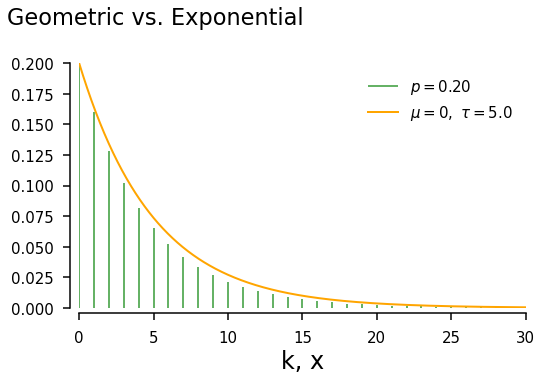

In [12]:
# Geometric
#
p = 0.2
k = np.arange(0, int(0.5 + stats.geom.ppf(0.999, p)))
f_k = stats.geom(p)

# Exponential 
#
tau = 1. / p
x = np.linspace(0, 6 * tau, 1000)
mu = 0
f_x = stats.expon(mu, tau)


# Plot
#
fig = plt.figure( figsize = (8, 4.5) )
fig.text(0, 1.0, 'Geometric vs. Exponential', fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "k, x", "", 
           font_size = my_fontsize)

ax.vlines(k-1, 0, f_k.pmf(k), color = "g", linewidth = 2, alpha = 0.6, 
          label = "$p = $" + f"{p:.2f}")
ax.plot(x, f_x.pdf(x), color = "orange", linewidth = 2,  
        label = "$\mu = $" + f"{mu}" + "$, ~\\tau = $" + f"{tau:.1f}")
# ax.semilogy(x, f_x0.pdf(x), color = "orange", linewidth = 2, alpha = 0.9, 
#             label = "Probability density")

ax.set_ylim(0, 0.2)
ax.set_xlim(0, 30)

# Format legend
ax.legend(loc = 'best', frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)


plt.show()

## Gaussian distribution 

The **central limit theorem** states that the sum of $N$ independent, identically-distributed (i.i.d.) and with finite standard deviation random variables converge to a Gaussian distribution as $N \to \infty$.

This distribution is also called normal and bell-shaped. The probability density for the **standard normal** is

> $\phi(z) = \frac{1}{\sqrt{2\pi}} ~e^{- z^2 / 2}$.

The mean, median, and mode are $0$; the standard deviation is 1. 


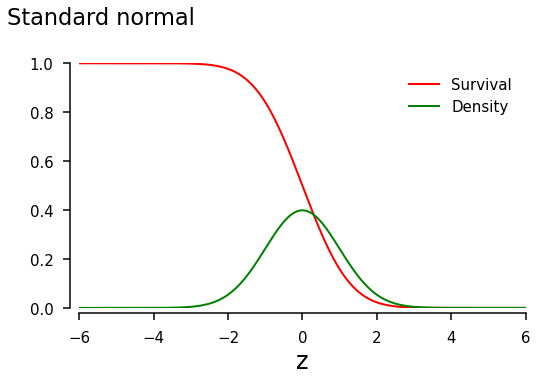

In [13]:
z = np.linspace(-6, 6, 1000) 
f_z = stats.norm()

fig = plt.figure( figsize = (8, 4.5) )
fig.text(0, 1.0, 'Standard normal', fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "z", "", font_size = my_fontsize)

# Calculate and plot histogram
ax.plot(z, f_z.sf(z), color = "r", linewidth = 2, 
        label = "Survival")
ax.plot(z, f_z.pdf(z), color = "g", linewidth = 2,  
        label = "Density")
# ax.semilogy(z, f.pdf(z), color = "g", linewidth = 2, alpha = 0.5, 
#             label = "Probability density")
# ax.plot(z, f_z.cdf(z), color = "b", linewidth = 2, 
#         label = "Cumulative")

ax.set_ylim(0, 1)
ax.set_xlim(-6, 6)

# Format legend
ax.legend(loc = 'best', frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)


plt.show()

Both the location $\mu$ and spread $\sigma$ can take values different from the standard ones:

> $X = \sigma Z + \mu$

and the probability density becomes:

> $f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma}}~ e^{- (x - \mu)^2 / 2\sigma^2}$ .

**Can you see where the name `z-score` comes from?**



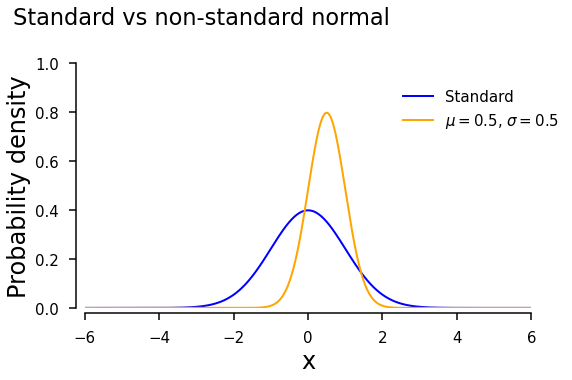

In [14]:
x = np.linspace(-6, 6, 1000) 

f_z = stats.norm()

mu, sigma = 0.5, 0.5
f_x = stats.norm(mu, sigma)

fig = plt.figure( figsize = (8, 4.5) )
fig.text(0, 1.0, 'Standard vs non-standard normal', 
        fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", font_size = my_fontsize)

# Calculate and plot histogram
ax.plot(x, f_z.pdf(x), color = "blue", linewidth = 2,  
        label = "Standard")
ax.plot(x, f_x.pdf(x), color = "orange", linewidth = 2,  
        label = f"$\\mu = ${mu:.1f}, $\\sigma = ${sigma:.1f}")

ax.set_ylim(0, 1)
ax.set_xlim(-6, 6)

# Format legend
ax.legend(loc = (0.7, 0.7), frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)


plt.show()

### Testing the central limit theorem computationally

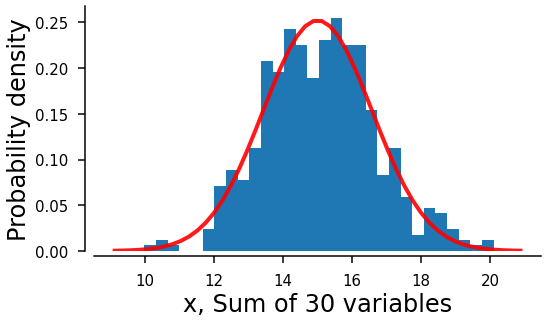

In [15]:
# Number and type of random variables being summed
#
n = 30    # Try other values
                  
# Uniform 
my_random = stats.uniform # Notice that we are storing a function in a variable
a, b = 0, 1
my_mean = 0.5
my_var = (b - a) / 12.

# Try other distributions

# Corresponding Gaussian model
#
mu = n * my_mean
sigma = np.sqrt(n * my_var)
x = np.linspace(stats.norm.ppf(0.0001, mu, sigma), 
                stats.norm.ppf(0.9999, mu, sigma))
f_x = stats.norm(mu, sigma)


many_times = 500
sample_of_sums = []
for i in range(many_times):
    sample  = my_random.rvs(a, b, size = n)
    sample_of_sums.append(sum(sample))

    
fig = plt.figure( figsize = (8, 4.5))
ax = fig.add_subplot(111)

half_frame(ax, f"x, Sum of {n} variables", "Probability density", 
           font_size = my_fontsize)

ax.hist(sample_of_sums, bins = 30, density = True)
ax.plot(x, f_x.pdf(x), color = "r", linewidth = 4, alpha = 0.9)


plt.show()

## Log-normal distribution 

Consider a random variable $X$ that is the product of other random variables with finite variance.  If we obtain the logarithm of $X$, then it is expressed as the sum of the logarithms of the other random variables.  Thus, the logarithm of $X$ will obey the central limit theorem and its distribution will converge to the Gaussian distribution.  $X$, in turn, will be distributed as a log-normal.

The probability density function is:

> $f(x; \mu, \sigma) = \frac{1}{x~\sigma~\sqrt{2\pi}} ~ \exp\left(-\frac{[(\ln x) - \mu]^2}{2s^2}\right)$

for $x > 0$, and $\sigma > 0$.

The median of the lognormal is $e^{\mu}$ and the mode is $e^{\mu - \sigma^2}$.


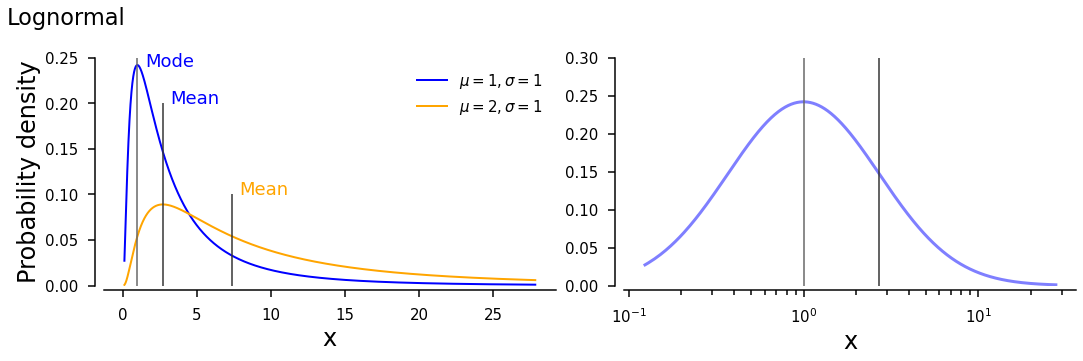

In [16]:
sigma, mu =  1., 1.

x = np.linspace( stats.lognorm.ppf(0.001, sigma, scale = np.exp(mu)), 
                 stats.lognorm.ppf(0.99, sigma, scale = np.exp(mu)), 5000)
f_x1 = stats.lognorm(sigma, scale = np.exp(mu))
f_x2 = stats.lognorm(sigma, scale = np.exp(2*mu))

fig = plt.figure( figsize = (15, 4.5) )
fig.text(0, 1.05, 'Lognormal', fontsize = 1.5*my_fontsize)
ax = []

# Left panel
#
ax.append( fig.add_subplot(1,2,1) )
half_frame(ax[-1], "x", "Probability density", font_size = my_fontsize)

ax[-1].plot(x, f_x1.pdf(x), color = "blue", linewidth = 2, 
          label = "$\mu = 1, \sigma = 1.$")
ax[-1].plot(x, f_x2.pdf(x), color = "orange", linewidth = 2, 
          label = "$\mu = 2, \sigma = 1.$")

ax[-1].set_ylim(0, 0.25 )

# Figure annotations
#
ax[-1].vlines(np.exp(mu - sigma**2), 0, 0.25, color = '0.4')
ax[-1].text(np.exp(mu - sigma**2)+0.5, 0.24, 'Mode',  color = 'blue',
            fontsize = 1.2*my_fontsize)

ax[-1].vlines(np.exp(mu), 0, 0.20, color = '0.2')
ax[-1].text(np.exp(mu)+0.5, 0.20, 'Mean', color = 'blue',
            fontsize = 1.2*my_fontsize)

ax[-1].vlines(np.exp(2*mu), 0, 0.10, color = '0.2')
ax[-1].text(np.exp(2*mu)+0.5, 0.10, 'Mean', color = 'orange',
            fontsize = 1.2*my_fontsize)

# Legend
ax[-1].legend(loc = 'best', frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)

# Right panel
#
ax.append( fig.add_subplot(1,2,2) )
half_frame(ax[-1], "x", "", font_size = my_fontsize)

ax[-1].semilogx(x, f_x1.pdf(x), color = "b", linewidth = 3, alpha = 0.5, 
          label = "")

ax[-1].vlines(np.exp(mu - sigma**2), 0, 0.3, color = '0.4')
ax[-1].vlines(np.exp(mu), 0, 0.3, color = '0.2')

ax[-1].set_ylim(0, 0.3)

plt.tight_layout()

## Beta distribution 

The beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by $\alpha$ and $\beta$, that appear as exponents of the random variable and control the shape of the distribution. It is a special case of the **Dirichlet distribution**.

**The beta distribution is a suitable model for the random behavior of percentages and proportions**. The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines.

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. For example, the beta distribution can be used in Bayesian analysis to describe initial knowledge concerning probability of success such as the probability that a space vehicle will successfully complete a specified mission.  

The probability density function is:

> $f(x; \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} ~ x^{\alpha - 1} ~ (1-x)^{\beta -1}~~~~~$ for $0 \le x \le 1$ 


where $\Gamma$ is the gamma function.

The shape of the distribution (single-peak versus bimodal) is determined by whether $\alpha = \beta$ and whether they are smaller or greater than 1.

The mean of the distribution is $\frac{\alpha}{\alpha + \beta}$.

The mode is:

> $\frac{\alpha -1 }{\alpha + \beta - 2}$ for $\alpha, \beta > 1$, 
>
> $0$ and $1$ for $\alpha, \beta < 1$ (bimodal)
>
> $0$ for $\alpha \le 1$ and $\beta > 1$, 
>
> $1$ for $\alpha > 1$ and $\beta \le 1$.

For $\alpha, \beta = 1$, the distribution is uniform, so there is no mode (or all points are the mode).

In [ ]:
# Try other parameter values
#
alpha1, beta1 = 3., 2.
f_x1 = stats.beta(alpha1, beta1)

alpha2, beta2 = 0.5, 0.4
f_x2 = stats.beta(alpha2, beta2)

x = np.linspace(0, 1, num = 100)

fig = plt.figure( figsize = (8, 4.5) )
fig.text(0, 1.0, 'Beta', fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", font_size = my_fontsize)

my_label1 = "$\\alpha =$" + f"{alpha1:0.1f}, " + "$\\beta =$" + f"{beta1:0.1f}"
ax.plot(x, f_x1.pdf(x), color = "b", linewidth = 2, 
        label = my_label1 )

my_label2 = "$\\alpha =$" + f"{alpha2:0.1f}, " + "$\\beta =$" + f"{beta2:0.1f}"
ax.plot(x, f_x2.pdf(x), color = "orange", linewidth = 2,  
        label = my_label2 )

ax.set_xlim(0, 1)
ax.set_ylim(0, 4)

# Legend
ax.legend(loc = 'best', frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)


plt.show()

## Gamma distribution 

The gamma distribution is a two-parameter family of continuous probability distributions. The probability density function is:

> $f(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} ~ x^{\alpha - 1} ~ e^{-\beta x}~~~~~$  for $x \ge 0$ 

where $\Gamma$ is the gamma function, and $\alpha, \beta > 0$. The mean of the gamma distribution is $\frac{\alpha}{\beta}$ and the standard deviation is $\frac{\sqrt{\alpha}}{\beta}$.

The mode is

> $\frac{\alpha - 1}{\beta}~~~$ for $\alpha \ge 1$, 
>
> $0~~~~~~$ for $\alpha < 1$.


There are three special cases of the gamma distribution:

> $\alpha = 1 \rightarrow$  the exponential distribution,
>
> $\alpha \in \mathbb{N} \rightarrow$ the Erlang distribution,
>
> $\beta = k/2, ~~~~ k \in \mathbb{N} \rightarrow$ the $\chi ^2$ distribution with $k$ degrees of freedom.  

For $\alpha \gg 1$, the Gamma distribution converges to normal distribution with mean $\frac{\alpha}{\beta}$ and variance $\frac{\alpha}{\beta ^2}$.


In [ ]:
alpha, location, beta = 0.4, 0., 5
x = np.linspace(stats.gamma.ppf(0.00001, alpha, location, beta), 
                stats.gamma.ppf(0.9999, alpha, location, beta), 500)
f_x = stats.gamma(alpha, location, beta)



fig = plt.figure( figsize = (6, 4.5) )
fig.text(0, 1.0, 'Gamma', fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", font_size = my_fontsize)

# Calculate and plot histogram
ax.loglog(x, f_x.pdf(x), color = "g", linewidth = 2, 
          label = f"$\\alpha = ${alpha}\n$\\beta = ${beta}")

# Format legend
ax.legend(loc = 'best', frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)

plt.show()

## Power-law distribution

Consider a random variable $Y$ that follows an exponential distribution with parameter $\tau = (\alpha - 1)^{-1}$. Then, the random variable $X = e^Y$ will have the probability density:

> $f(x; \alpha) = (\alpha - 1) ~x^{-\alpha}~~~~~~$ for $x > 1$.


In [ ]:
x = np.linspace(1, 10, 500) 

alpha1 = 2
tau1 = 1/ (alpha1 - 1)
f_x1 = stats.expon(0, tau1)

alpha2 = 3
tau2 = 1/ (alpha2 - 1)
f_x2 = stats.expon(0, tau2)


fig = plt.figure( figsize = (8, 4.5) )
fig.text(0, 1.0, 'Power law', fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", font_size = my_fontsize)

ax.loglog(np.exp(x), f_x1.pdf(x) / np.exp(x) , color = "b", 
          linewidth = 2, label = f"$\\alpha =${alpha1:.1f}")
ax.loglog(np.exp(x), f_x2.pdf(x) / np.exp(x) , color = "orange", 
          linewidth = 2, label = f"$\\alpha =${alpha2:.1f}")
ax.loglog(np.exp(x), (alpha1 - 1) / np.exp(x*(alpha1)) , '--', color = "k", 
          linewidth = 1, label = "$x^{-2}$")
ax.loglog(np.exp(x), (alpha2 - 1) / np.exp(x*(alpha2)), '-.', color = "k", 
          linewidth = 1, label = "$2~x^{-3}$")

# Format legend
ax.legend(loc = 'best', frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)

plt.show()

# Lévy stable distribution 

In probability theory, a distribution is said to be stable if a linear combination of two independent random variables with this distribution has the same distribution, up to location and scale parameters. A random variable is said to be stable if its distribution is stable. The importance of stable probability distributions is that they are **attractors** for properly normed sums of independent and identically distributed (iid) random variables.

The stable distribution family is also sometimes referred to as the Lévy $\alpha$-stable distribution, after Paul Lévy, the first mathematician to have studied it.

The probability density function does not have a closed mathematical form except for some parameter values. Of the four parameters defining the family, most attention has been focused on the stability parameter, $\alpha$.
The distributions have undefined variance for $\alpha <2$, and undefined mean for $\alpha \leq 1$. 

Stable distributions have $0< \alpha \leq 2$, with the upper bound corresponding to the **normal distribution**,  $\alpha = 1$ to the **Cauchy distribution**, and $\alpha = 1/2$ to the **Lévy distribution** (for $\beta = 1$) and the **Lévy-l distribution** (for $\beta = -1$).


## Cauchy distribution

The probability density function of the standard Cauchy distribution is: 

> $f(x) = \frac{1}{\pi ~(x^2 + 1)}$.

With location $\mu$ and scale $s$, the probability density becomes:

> $f(x; \mu, s) = \frac{s^2}{\pi ~\left[ (x - \mu)^2  + s^2 ~\right]}$.

**Both the mean and the standard deviation of the Cauchy distribution are undefined**.


In [ ]:
x = np.linspace(-100, 100, 500)

mu1, s1 = 0., 3.
f_x1 = stats.cauchy(mu1, s1)

mu2, s2 = 0., 5.
f_x2 = stats.cauchy(mu2, s2)

fig = plt.figure( figsize = (6, 4.5) )
fig.text(0, 1.0, 'Cauchy', fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", font_size = my_fontsize)

ax.semilogy(x, f_x1.pdf(x), color = "b", linewidth = 2,  
          label = f"$\\mu = ${mu1:.1f}\n$s = ${s1:.1f}")
ax.plot(x, f_x2.pdf(x), color = "orange", linewidth = 2,  
          label = f"$\\mu = ${mu2:.1f}\n$s = ${s2:.1f}")

# Format legend
ax.legend(loc = 'best', frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)

plt.show()

## Lévy distribution
The probability density function of the standard Lévy distribution is: 

> $f(x) = \sqrt{\frac{1}{2\pi}} ~ x^{-3/2} ~ e^{-\frac{1}{2x}} ~~~~~~$ for $x \ge 0$ .

With location $\mu$ and scale $s$, the probability density becomes:

> $f(x; \mu, s) = \sqrt{\frac{s}{2\pi}} ~ (x - \mu)^{-3/2} ~ e^{-\frac{s}{2(x - \mu)}} ~~~~~~$ for $x \ge \mu$ .

Both the mean and the standard deviation of the Lévy distribution are undefined. The mode is $\mu + \frac{s}{3}$

The probability density function of the **Lévy-l distribution** is: 

> $f(x; \mu, s) = \sqrt{\frac{s}{2\pi}} ~ |x - \mu|^{-3/2} ~ e^{-\frac{s}{2|x - \mu|}} ~~~~~~$ for $x \le 0$ .

where, again, $\mu$ is the location parameter and $s$ is the scale parameter.



In [ ]:
x = np.linspace(0, 1000, 50000)

mu1, s1 = 0., 1.
f_x1 = stats.levy(mu1, s1)

mu2, s2 = 0., 3.
f_x2 = stats.levy(mu2, s2)

mu3, s3 = 1., 3.
f_x3 = stats.levy(mu3, s3)

fig = plt.figure( figsize = (6, 4.5) )
fig.text(0, 1.0, 'Lévy', fontsize = 1.5*my_fontsize)
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", font_size = my_fontsize)

ax.loglog(x, f_x1.pdf(x), color = "k", linewidth = 2,  
          label = f"$\\mu = ${mu1:.1f}, $s = ${s1:.1f}")
ax.plot(x, f_x2.pdf(x), color = "b", linewidth = 2,  
          label = f"$\\mu = ${mu2:.1f}, $s = ${s2:.1f}")
ax.plot(x, f_x3.pdf(x), color = "orange", linewidth = 2,  
          label = f"$\\mu = ${mu3:.1f}, $s = ${s3:.1f}")

ax.set_xlim(0.01, 100)
ax.set_ylim(0.00001, 1)

# Format legend
ax.legend(loc = (1, 0.7), frameon = False, markerscale = 1.8, 
          fontsize = my_fontsize)

plt.show()